In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
df1 = pd.read_csv('Sparkling.csv')
df1.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [13]:
df1 = pd.read_csv('Sparkling.csv', parse_dates=['YearMonth'], index_col=['YearMonth'])
df1.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [14]:
df1.tail()

Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [16]:
df1.isnull().sum()

Sparkling    0
dtype: int64

In [17]:
df1.shape

(187, 1)

In [9]:
from pylab import rcParams
rcParams['figure.figsize']=16,8

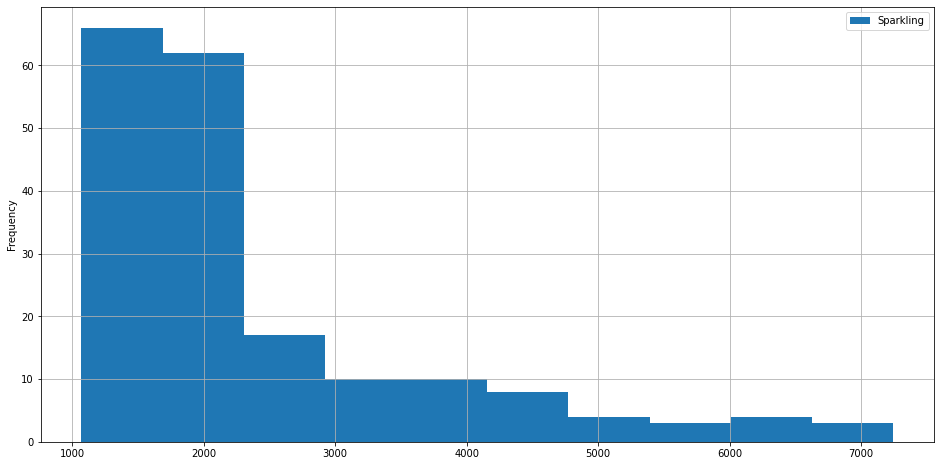

In [214]:
df1.plot(kind='hist',grid=True);

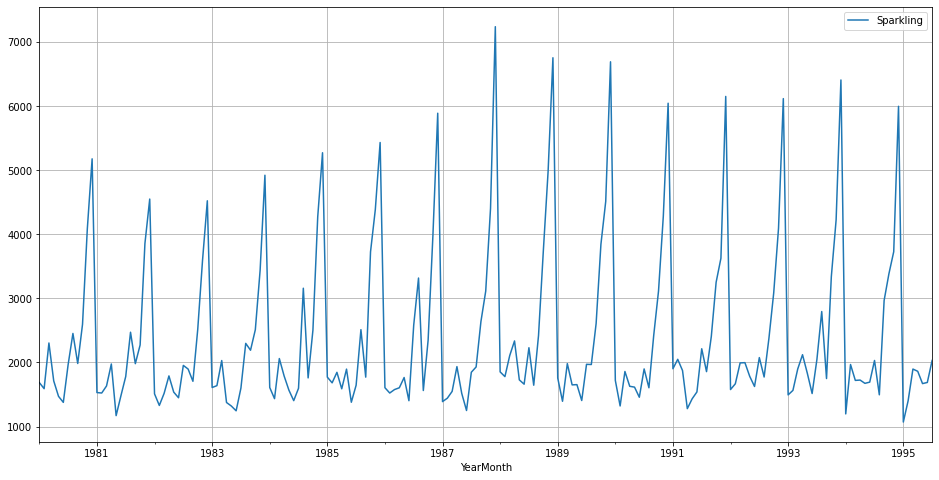

In [18]:
df1.plot(grid=True);

In [19]:
df1.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

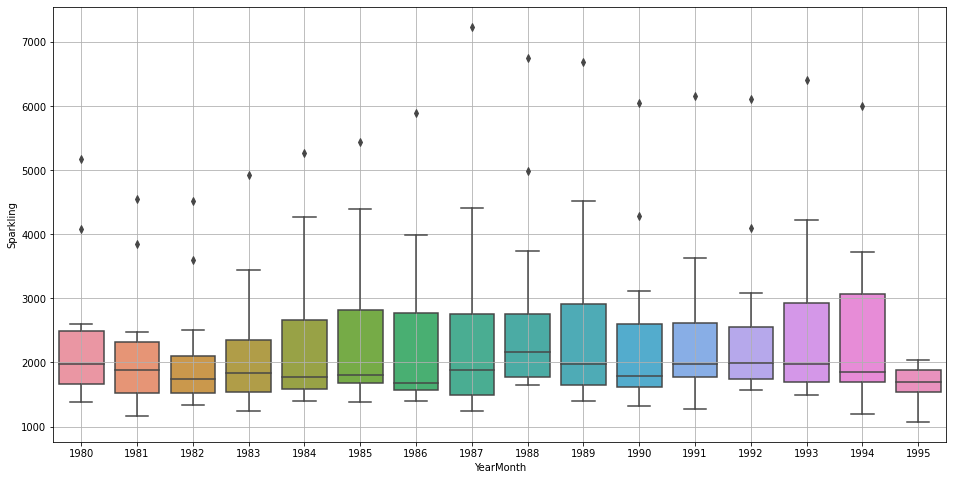

In [20]:
sns.boxplot(x = df1.index.year,y = df1['Sparkling'])
plt.grid();

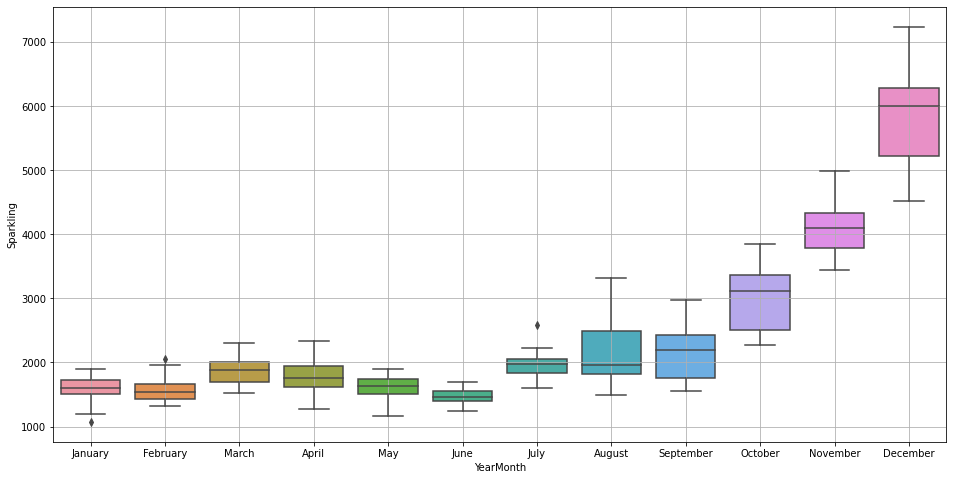

In [21]:
sns.boxplot(x = df1.index.month_name(),y = df1['Sparkling'])
plt.grid();

In [22]:
monthly_sales = pd.pivot_table(df1, values='Sparkling', index = df1.index.year, columns=df1.index.month)
monthly_sales

YearMonth      1       2       3       4       5       6       7       8   \
YearMonth                                                                   
1980       1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981       1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982       1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983       1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984       1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985       1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986       1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987       1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988       1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989       1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990       1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991       1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992       1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993       1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994       1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995       1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

YearMonth      9       10      11      12  
YearMonth                                  
1980       1984.0  2596.0  4087.0  5179.0  
1981       1981.0  2273.0  3857.0  4551.0  
1982       1706.0  2514.0  3593.0  4524.0  
1983       2191.0  2511.0  3440.0  4923.0  
1984       1759.0  2504.0  4273.0  5274.0  
1985       1771.0  3727.0  4388.0  5434.0  
1986       1562.0  2349.0  3987.0  5891.0  
1987       2638.0  3114.0  4405.0  7242.0  
1988       2421.0  3740.0  4988.0  6757.0  
1989       2608.0  3845.0  4514.0  6694.0  
1990       2424.0  3116.0  4286.0  6047.0  
1991       2408.0  3252.0  3627.0  6153.0  
1992       2377.0  3088.0  4096.0  6119.0  
1993       1749.0  3339.0  4227.0  6410.0  
1994       2968.0  3385.0  3729.0  5999.0  
1995          NaN     NaN     NaN     NaN

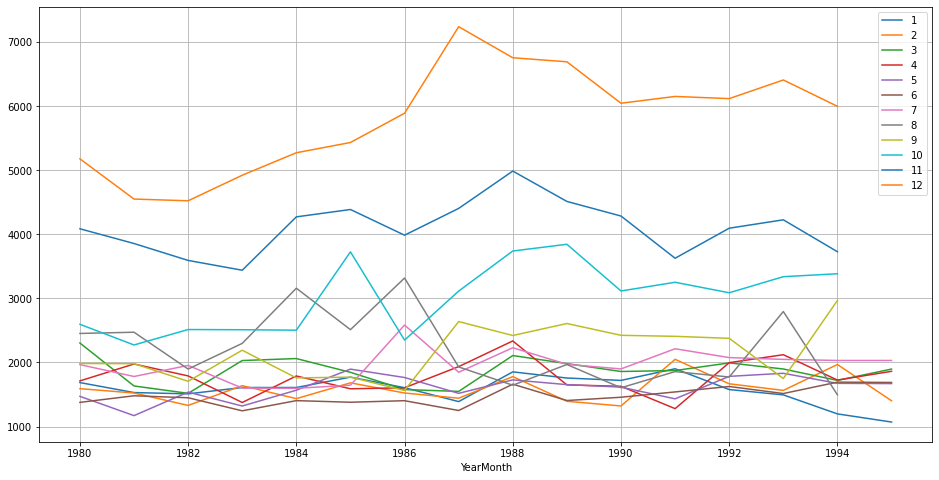

In [23]:
monthly_sales.plot()
plt.grid();
plt.legend(loc='best');

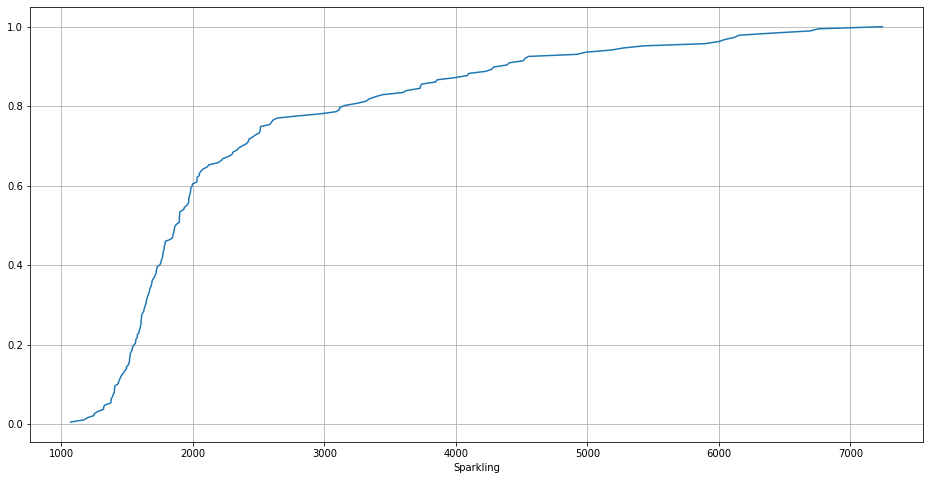

In [24]:
from statsmodels.distributions.empirical_distribution import ECDF

cdf = ECDF(df1['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sparkling');

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

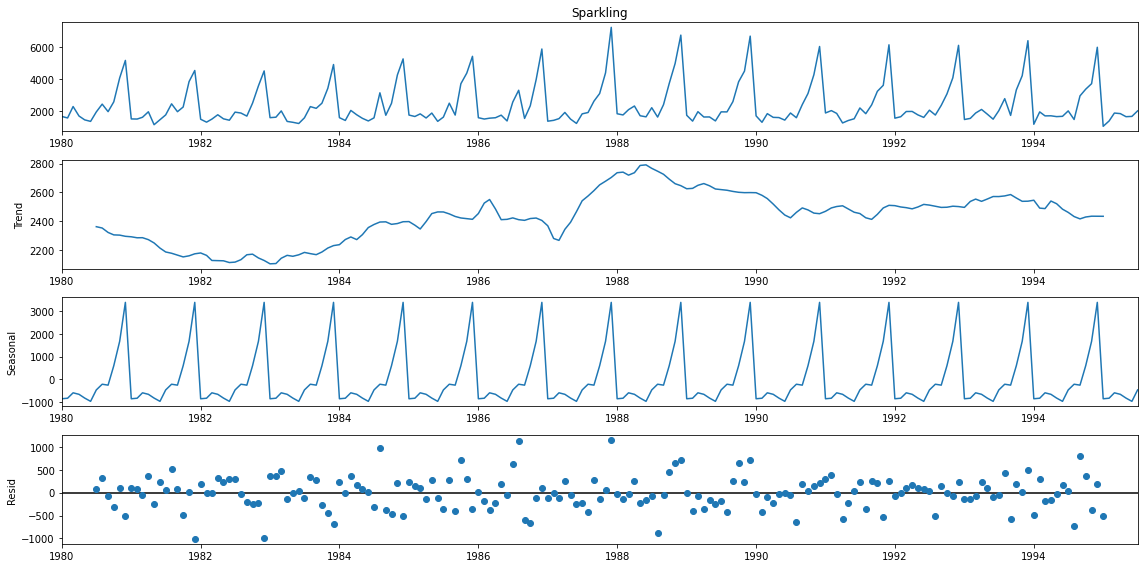

In [26]:
df1_add = seasonal_decompose(df1['Sparkling'], model='additive')
df1_add.plot();

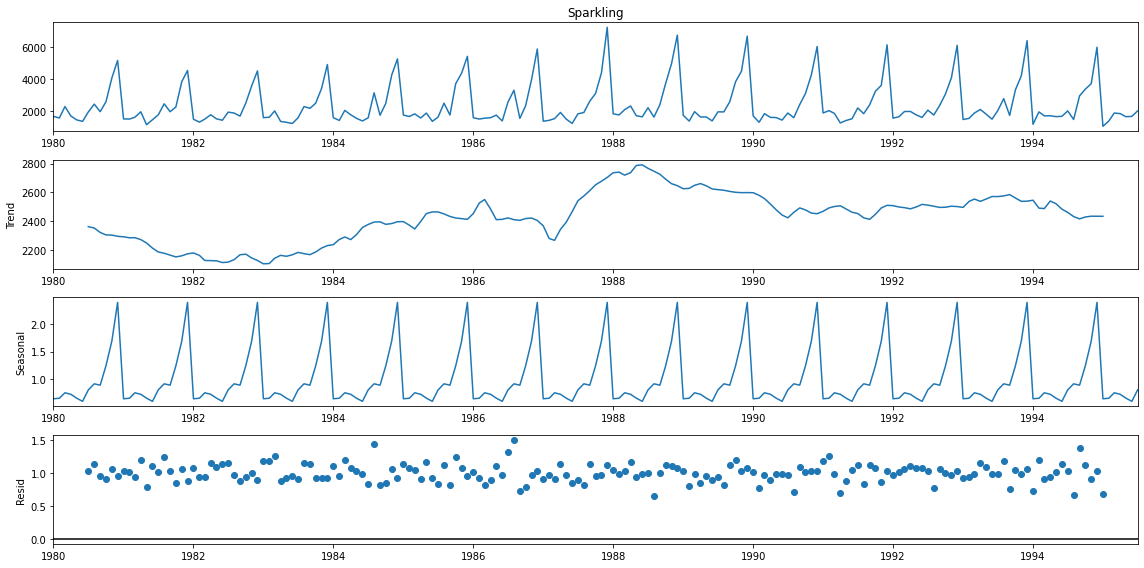

In [27]:
df1_mul = seasonal_decompose(df1['Sparkling'], model='multiplicative')
df1_mul.plot();

In [28]:
trend= df1_mul.trend
seasonality =df1_mul.seasonal
residual = df1_mul.resid

print('Trend','\n', trend.head(15),'\n')
print('Seasonality','\n',seasonality.head(15),'\n')
print('Residual','\n', residual.head(15),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
1981-01-01    2290.375000
1981-02-01    2283.458333
1981-03-01    2284.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
1981-01-01    0.649843
1981-02-01    0.659214
1981-03-01    0.757440
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1

In [29]:
train=df1[df.index.year<1991]
test=df1[df.index.year>=1991]

In [30]:
print('Train Set Size', '\n',train.shape,'\n')
print('Test Set Size', '\n', test.shape,'\n')

Train Set Size 
 (132, 1) 

Test Set Size 
 (55, 1) 



In [31]:
train.tail()

Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

In [32]:
test.head()

Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

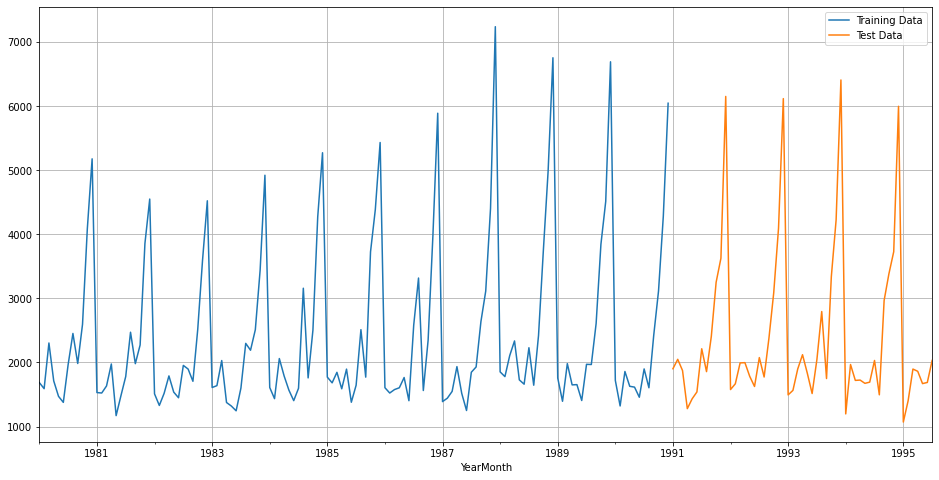

In [33]:
train['Sparkling'].plot()
test['Sparkling'].plot()
plt.grid();
plt.legend(['Training Data', 'Test Data']);
plt.show();

In [34]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [35]:
LR_train = train.copy()
LR_test = test.copy()

In [36]:
LR_train['time'] = train_time
LR_test['time'] = test_time

In [37]:
LR_test.head()

Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137

In [38]:
LR_train.head()

Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lr=LinearRegression()

In [41]:
lr.fit(LR_train[['time']], LR_train['Sparkling'].values)

LinearRegression()

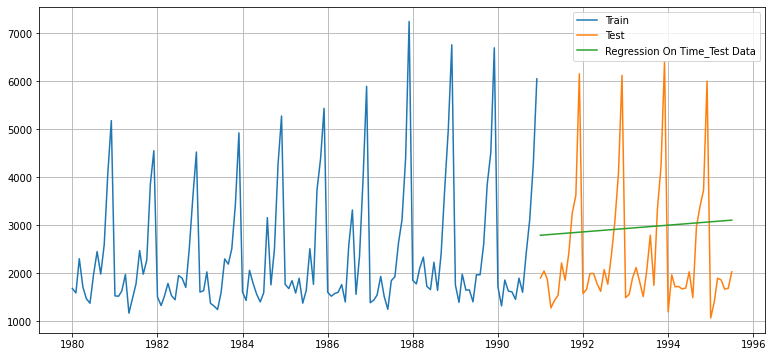

In [42]:
test_predictions_model1         = lr.predict(LR_test[['time']])
LR_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LR_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [43]:
from sklearn import metrics

In [45]:
rmse_test= metrics.mean_squared_error(test['Sparkling'], test_predictions_model1, squared=False)
print('For regressionOntime forecast on the test data, RMSE is %3.3f'%(rmse_test))

For regressionOntime forecast on the test data, RMSE is 1389.135


In [58]:
resultSparkling = pd.DataFrame({'RMSE': [rmse_test]}, index=['RegressionOnTime'])
resultSparkling

RMSE
RegressionOnTime  1389.135175

In [47]:
Ntrain=train.copy()
Ntest=test.copy()

In [48]:
Ntest['Naive']= np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
Ntest['Naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: Naive, dtype: int64

Text(0.5, 1.0, 'Naive Forecaast for Sparkling Wine')

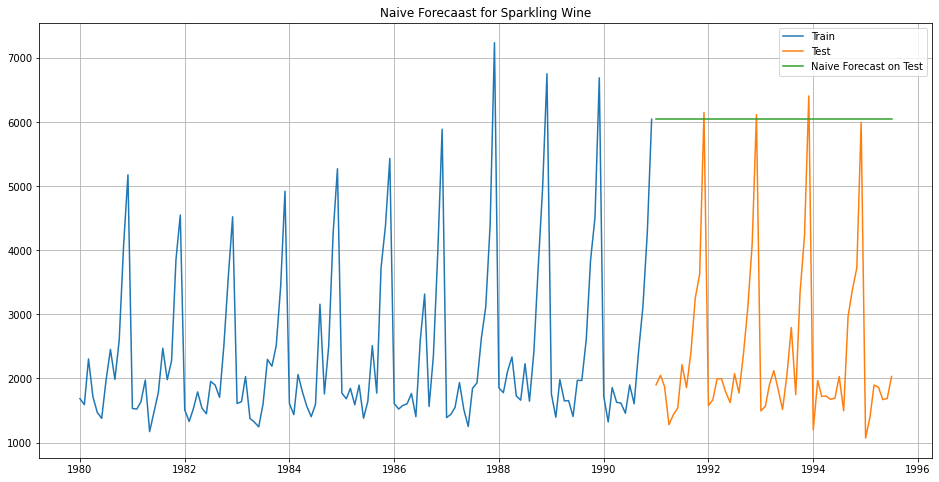

In [216]:
plt.plot(Ntrain['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(Ntest['Naive'], label='Naive Forecast on Test')
plt.legend(loc='best')
plt.grid();
plt.title('Naive Forecaast for Sparkling Wine')

In [51]:
rmse_test2 = metrics.mean_squared_error(test['Sparkling'], Ntest['Naive'], squared=False)
print('For regressionOnTime on the test data, RMSE is %3.3f' %(rmse_test2))

For regressionOnTime on the test data, RMSE is 3864.279


In [59]:
resultNaive = pd.DataFrame({'RMSE': rmse_test2},index=['Naive Model'])
resultSparkling = pd.concat([resultSparkling, resultNaive])
resultSparkling

RMSE
RegressionOnTime  1389.135175
Naive Model       3864.279352

In [53]:
SA_train = train.copy()
SA_test = test.copy()

In [54]:
SA_test['forecast'] =train['Sparkling'].mean()
SA_test.head()

Sparkling     forecast
YearMonth                         
1991-01-01       1902  2403.780303
1991-02-01       2049  2403.780303
1991-03-01       1874  2403.780303
1991-04-01       1279  2403.780303
1991-05-01       1432  2403.780303

Text(0.5, 1.0, 'Simple Average Forecaast for Sparkling Wine')

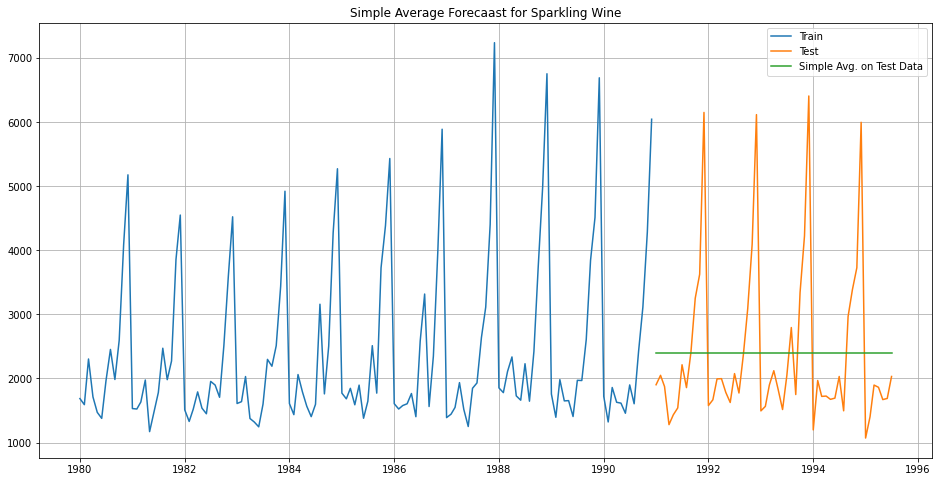

In [55]:
plt.plot(SA_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(SA_test['forecast'], label='Simple Avg. on Test Data')
plt.legend(loc='best')
plt.grid();
plt.title('Simple Average Forecaast for Sparkling Wine')

In [56]:
rmse_test3 = metrics.mean_squared_error(test['Sparkling'], SA_test['forecast'],squared=False)
print('Forecast for Simple Avg. on Test Data RMSE is %3.3f' %(rmse_test3))

Forecast for Simple Avg. on Test Data RMSE is 1275.082


In [60]:
results = pd.DataFrame({'RMSE': rmse_test3}, index=['Simple Average Model'])

resultSparkling = pd.concat([resultSparkling, results])
resultSparkling

RMSE
RegressionOnTime      1389.135175
Naive Model           3864.279352
Simple Average Model  1275.081804

In [61]:
MA = df1.copy()
MA.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [62]:
MA['T_2'] = MA['Sparkling'].rolling(2).mean()
MA['T_4'] = MA['Sparkling'].rolling(4).mean()
MA['T_6'] = MA['Sparkling'].rolling(6).mean()
MA['T_9'] = MA['Sparkling'].rolling(9).mean()

MA.head(10)

Sparkling     T_2      T_4          T_6          T_9
YearMonth                                                       
1980-01-01       1686     NaN      NaN          NaN          NaN
1980-02-01       1591  1638.5      NaN          NaN          NaN
1980-03-01       2304  1947.5      NaN          NaN          NaN
1980-04-01       1712  2008.0  1823.25          NaN          NaN
1980-05-01       1471  1591.5  1769.50          NaN          NaN
1980-06-01       1377  1424.0  1716.00  1690.166667          NaN
1980-07-01       1966  1671.5  1631.50  1736.833333          NaN
1980-08-01       2453  2209.5  1816.75  1880.500000          NaN
1980-09-01       1984  2218.5  1945.00  1827.166667  1838.222222
1980-10-01       2596  2290.0  2249.75  1974.500000  1939.333333

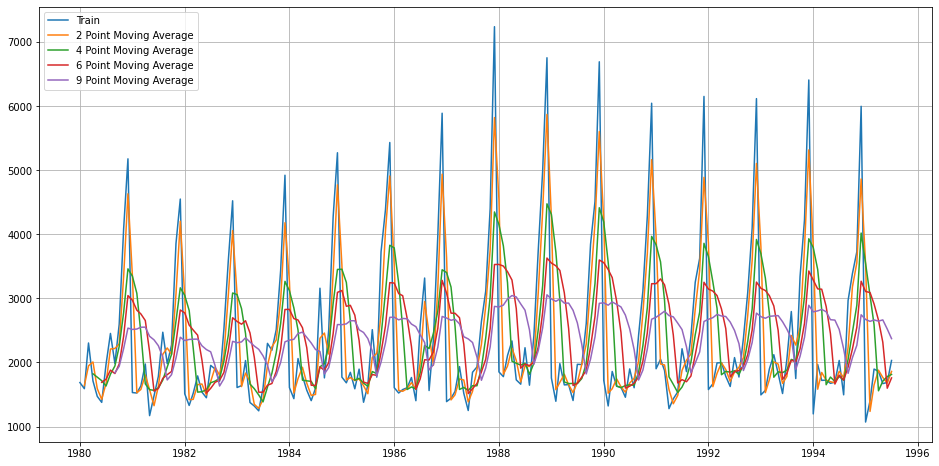

In [63]:
plt.plot(MA['Sparkling'], label='Train')
plt.plot(MA['T_2'], label='2 Point Moving Average')
plt.plot(MA['T_4'], label='4 Point Moving Average')
plt.plot(MA['T_6'],label = '6 Point Moving Average')
plt.plot(MA['T_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [64]:
MA_train = MA[MA.index.year<1991]
MA_test = MA[MA.index.year>=1991]

In [65]:
MA_test.head()

Sparkling     T_2      T_4          T_6          T_9
YearMonth                                                       
1991-01-01       1902  3974.5  3837.75  3230.000000  2705.666667
1991-02-01       2049  1975.5  3571.00  3304.000000  2753.888889
1991-03-01       1874  1961.5  2968.00  3212.333333  2800.222222
1991-04-01       1279  1576.5  1776.00  2906.166667  2731.333333
1991-05-01       1432  1355.5  1658.50  2430.500000  2712.111111

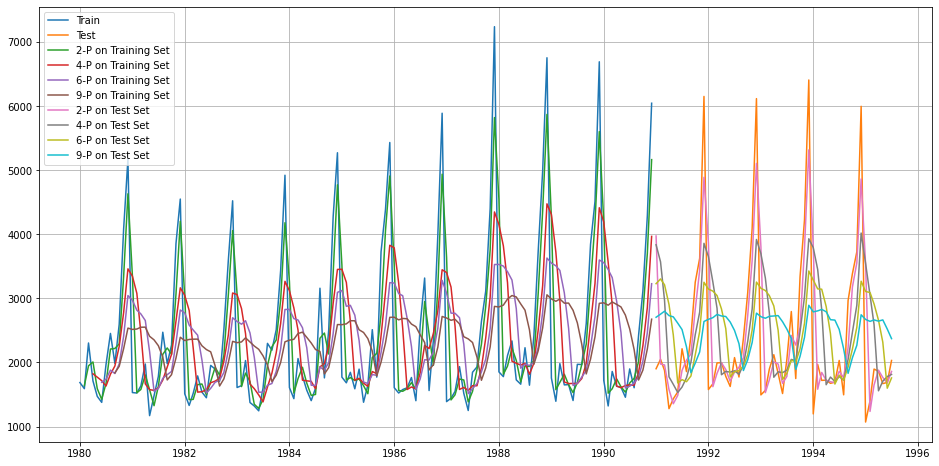

In [66]:
plt.plot(MA_train['Sparkling'],label='Train')
plt.plot(MA_test['Sparkling'],label='Test')

plt.plot(MA_train['T_2'], label = '2-P on Training Set' )
plt.plot(MA_train['T_4'], label = '4-P on Training Set' )
plt.plot(MA_train['T_6'], label = '6-P on Training Set' )
plt.plot(MA_train['T_9'], label = '9-P on Training Set' )

plt.plot(MA_test['T_2'], label = '2-P on Test Set' )
plt.plot(MA_test['T_4'], label = '4-P on Test Set' )
plt.plot(MA_test['T_6'], label = '6-P on Test Set' )
plt.plot(MA_test['T_9'], label = '9-P on Test Set' )
plt.legend(loc='best')
plt.grid()
plt.show();

In [68]:
rmse_test4_T_2 = metrics.mean_squared_error(test['Sparkling'], MA_test['T_2'], squared=False)
print('For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f' %(rmse_test4_T_2))

rmse_test4_T_4 = metrics.mean_squared_error(test['Sparkling'], MA_test['T_4'], squared=False)
print('For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f' %(rmse_test4_T_4))

rmse_test4_T_6 = metrics.mean_squared_error(test['Sparkling'], MA_test['T_6'], squared=False)
print('For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f' %(rmse_test4_T_6))

rmse_test4_T_9 = metrics.mean_squared_error(test['Sparkling'], MA_test['T_9'], squared=False)
print('For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f' %(rmse_test4_T_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278


In [69]:
resultsMA = pd.DataFrame({'RMSE': [rmse_test4_T_2, rmse_test4_T_4, rmse_test4_T_6,rmse_test4_T_9]},
                        index=['2-P Moving Average','4-P Moving Average','6-P Moving Average',
                              '9-P Moving Average'])
resultSparkling = pd.concat([resultSparkling, resultsMA])
resultSparkling

RMSE
RegressionOnTime      1389.135175
Naive Model           3864.279352
Simple Average Model  1275.081804
2-P Moving Average     813.400684
4-P Moving Average    1156.589694
6-P Moving Average    1283.927428
9-P Moving Average    1346.278315

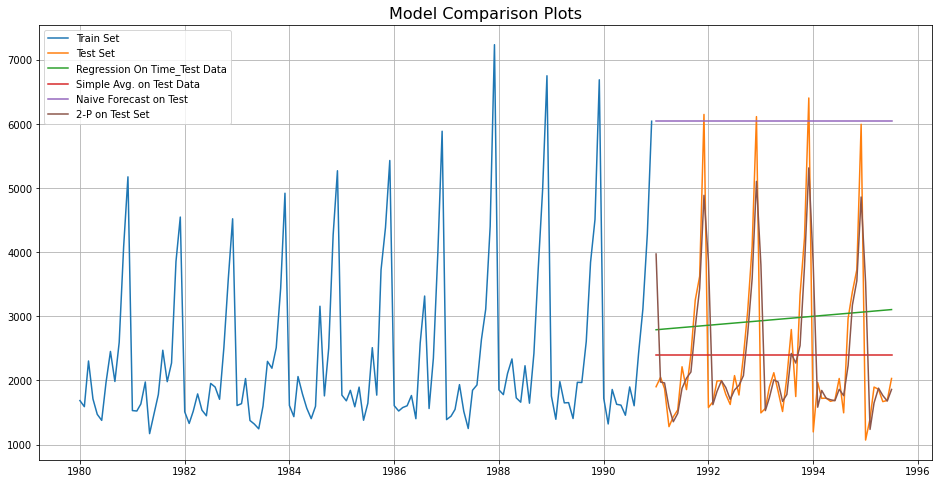

In [70]:
plt.plot(train['Sparkling'], label = 'Train Set')
plt.plot(test['Sparkling'], label = 'Test Set')

plt.plot(LR_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(SA_test['forecast'], label='Simple Avg. on Test Data')

plt.plot(Ntest['Naive'], label='Naive Forecast on Test')

plt.plot(MA_test['T_2'], label = '2-P on Test Set' )

plt.legend(loc='best')
plt.title('Model Comparison Plots', fontsize=16)
plt.grid()
plt.show();

In [71]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [72]:
SES_train = train.copy()
SES_test = test.copy()

In [73]:
model_SES=SimpleExpSmoothing(SES_train['Sparkling'])

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [74]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [75]:
model_SES_autofit.params

{'smoothing_level': 0.04960659880745941,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.504753843532,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [76]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


Sparkling      predict
YearMonth                         
1991-01-01       1902  2724.929339
1991-02-01       2049  2724.929339
1991-03-01       1874  2724.929339
1991-04-01       1279  2724.929339
1991-05-01       1432  2724.929339

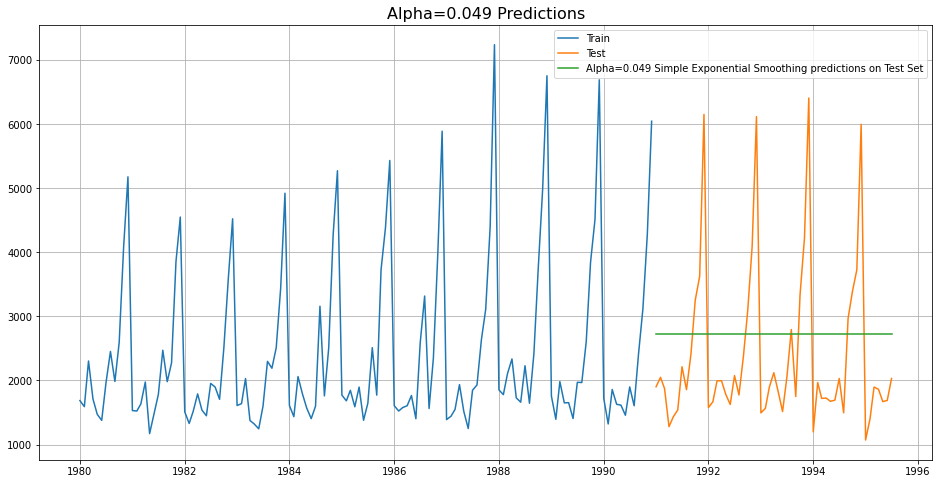

In [77]:
plt.plot(SES_train['Sparkling'], label='Train') 
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label = 'Alpha=0.049 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha=0.049 Predictions', fontsize=16)
plt.show();

In [78]:
rmse_SES = metrics.mean_squared_error(SES_test['Sparkling'], SES_test['predict'], squared=False)
print('For Alpha=0.049 simple Exponential Smoothing forecast on test data, RMSE is %3.3f' %(rmse_SES))

For Alpha=0.049 simple Exponential Smoothing forecast on test data, RMSE is 1316.035


In [79]:
resultsSES = pd.DataFrame({'RMSE': rmse_SES}, index=['Alpha=0.049 Simple Exp-Smoothing'])

resultSparkling = pd.concat([resultSparkling, resultsSES])
resultSparkling

RMSE
RegressionOnTime                  1389.135175
Naive Model                       3864.279352
Simple Average Model              1275.081804
2-P Moving Average                 813.400684
4-P Moving Average                1156.589694
6-P Moving Average                1283.927428
9-P Moving Average                1346.278315
Alpha=0.049 Simple Exp-Smoothing  1316.034674

In [ ]:
#Checkinhg for Alhpa values

In [86]:
ResultAlpha1 = pd.DataFrame({'Alpha':[], 'Train RMSE': [], 'Test RMSE':[]})
ResultAlpha1

Empty DataFrame
Columns: [Alpha, Train RMSE, Test RMSE]
Index: []

In [87]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    ResultAlpha1 = ResultAlpha1.append({'Alpha':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

In [88]:
ResultAlpha1.sort_values(by=['Test RMSE'], ascending=True)

Alpha   Train RMSE    Test RMSE
0    0.1  1333.873836  1375.393398
1    0.2  1356.042987  1595.206839
2    0.3  1359.511747  1935.507132
3    0.4  1352.588879  2311.919615
4    0.5  1344.004369  2666.351413
5    0.6  1338.805381  2979.204388
6    0.7  1338.844308  3249.944092
7    0.8  1344.462091  3483.801006
8    0.9  1355.723518  3686.794285

In [89]:
DES_train=train.copy()
DES_test=test.copy()

In [90]:
model_DES = Holt(DES_train['Sparkling'])

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [91]:
model_DES_autofit=model_DES.fit()

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [92]:
model_DES_autofit.params

{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [93]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [94]:
DES_test['predict'].head()

YearMonth
1991-01-01    5221.278699
1991-02-01    5127.886554
1991-03-01    5034.494409
1991-04-01    4941.102264
1991-05-01    4847.710119
Name: predict, dtype: float64

In [95]:
rmse_DES=metrics.mean_squared_error(DES_test['Sparkling'], DES_test['predict'], squared=False)
rmse_DES

2007.238525758568

In [100]:
resultsDES1 = pd.DataFrame({'Alpha':[], 'Beta':[], 'Train RMSE':[], 'Test RMSE':[]})
resultsDES1

Empty DataFrame
Columns: [Alpha, Beta, Train RMSE, Test RMSE]
Index: []

In [101]:
for i in np.arange(0,1,0.1):
    for j in np.arange(0,1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        resultsDES1 = resultsDES1.append({'Alpha':i,'Beta':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

In [102]:
resultsDES1.sort_values(by='Test RMSE',ascending=True).head()

Alpha  Beta   Train RMSE    Test RMSE
11    0.1   0.1  1382.520870  1778.564670
60    0.6   0.0  1353.081728  2004.479267
70    0.7   0.0  1349.696523  2024.922482
50    0.5   0.0  1363.627617  2046.410581
80    0.8   0.0  1352.968870  2080.557083

In [103]:
DES_test['predict', 0.1, 0.1]

YearMonth
1991-01-01    2849.235097
1991-02-01    2876.192175
1991-03-01    2903.149252
1991-04-01    2930.106330
1991-05-01    2957.063408
1991-06-01    2984.020485
1991-07-01    3010.977563
1991-08-01    3037.934641
1991-09-01    3064.891719
1991-10-01    3091.848796
1991-11-01    3118.805874
1991-12-01    3145.762952
1992-01-01    3172.720030
1992-02-01    3199.677107
1992-03-01    3226.634185
1992-04-01    3253.591263
1992-05-01    3280.548341
1992-06-01    3307.505418
1992-07-01    3334.462496
1992-08-01    3361.419574
1992-09-01    3388.376652
1992-10-01    3415.333729
1992-11-01    3442.290807
1992-12-01    3469.247885
1993-01-01    3496.204963
1993-02-01    3523.162040
1993-03-01    3550.119118
1993-04-01    3577.076196
1993-05-01    3604.033274
1993-06-01    3630.990351
1993-07-01    3657.947429
1993-08-01    3684.904507
1993-09-01    3711.861584
1993-10-01    3738.818662
1993-11-01    3765.775740
1993-12-01    3792.732818
1994-01-01    3819.689895
1994-02-01    3846.646973
19

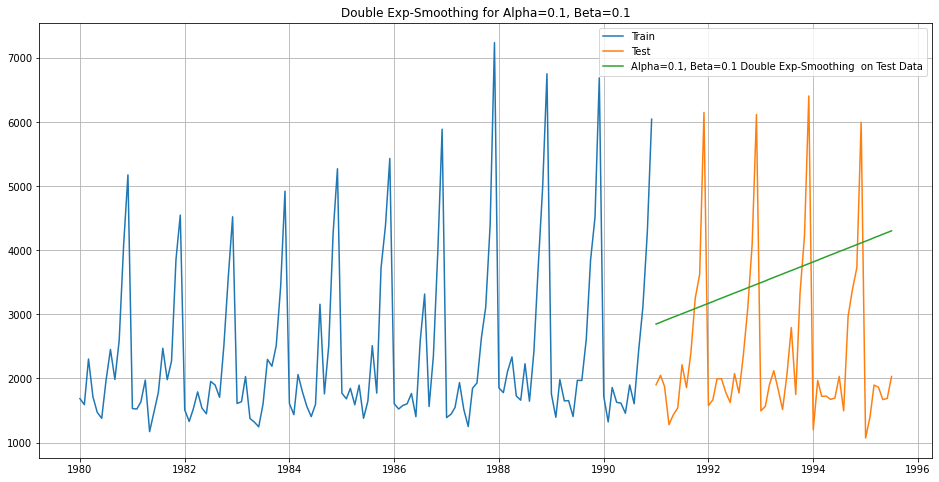

In [104]:
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label = 'Alpha=0.1, Beta=0.1 Double Exp-Smoothing  on Test Data')

plt.legend(loc='best')
plt.title('Double Exp-Smoothing for Alpha=0.1, Beta=0.1')
plt.grid()
plt.show();

In [105]:
results_DES = pd.DataFrame({'RMSE': [resultsDES1.sort_values(by=['Test RMSE']).values[0][3]]}, index=['Alpha=0.1, Beta=0.1, Double Exp-Smoothing'])

resultSparkling = pd.concat([resultSparkling, results_DES])
resultSparkling

RMSE
RegressionOnTime                           1389.135175
Naive Model                                3864.279352
Simple Average Model                       1275.081804
2-P Moving Average                          813.400684
4-P Moving Average                         1156.589694
6-P Moving Average                         1283.927428
9-P Moving Average                         1346.278315
Alpha=0.049 Simple Exp-Smoothing           1316.034674
Alpha=0.1, Beta=0.1, Double Exp-Smoothing  1778.564670

In [106]:
TES_train = train.copy()
TES_test = test.copy()

In [107]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive', seasonal='multiplicative')

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [108]:
model_TES_autofit= model_TES.fit()

In [109]:
model_TES_autofit.params

{'smoothing_level': 0.11107217417240671,
 'smoothing_trend': 0.06170680469762709,
 'smoothing_seasonal': 0.3950791076065561,
 'damping_trend': nan,
 'initial_level': 1640.0000512525944,
 'initial_trend': -15.109511572670874,
 'initial_seasons': array([1.03456669, 0.99021652, 1.40531664, 1.20126559, 0.9391404 ,
        0.9515692 , 1.29531027, 1.68051909, 1.35779891, 1.79440879,
        2.82810882, 3.60193154]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [110]:
TES_predict = model_TES_autofit.forecast(len(test))
TES_predict.head()

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-01    1577.247584
1991-02-01    1333.627590
1991-03-01    1746.043504
1991-04-01    1630.571774
1991-05-01    1523.311906
Freq: MS, dtype: float64

In [111]:
metrics.mean_squared_error(TES_test['Sparkling'], TES_predict,squared=False)

469.59151602946747

In [112]:
resultsTES_1 = pd.DataFrame({'Alpha':[],'Beta':[],'Gamma':[],'Train RMSE':[],'Test RMSE': []})
resultsTES_1

Empty DataFrame
Columns: [Alpha, Beta, Gamma, Train RMSE, Test RMSE]
Index: []

In [113]:
for i in np.arange(0,1.1,0.1):
    for j in np.arange(0,1.1,0.1):
        for k in np.arange(0,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            
            resultsTES_1 = resultsTES_1.append({'Alpha':i,'Beta':j,'Gamma':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\b

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame

<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame

<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame

<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame

<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\t

<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
<ipython-input-113-3d1405340e91>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
<ipython-input-113-3d1405340e91>:5: PerformanceWarning: DataFrame

In [114]:
resultsTES_1.sort_values(by=['Test RMSE'], ascending=True)

Alpha  Beta  Gamma     Train RMSE     Test RMSE
497     0.4   0.1    0.2     389.772245  3.367153e+02
387     0.3   0.2    0.2     395.529174  3.501452e+02
265     0.2   0.2    0.1     405.333164  3.525717e+02
375     0.3   0.1    0.1     394.630053  3.526078e+02
155     0.1   0.3    0.1     414.423963  3.545346e+02
...     ...   ...    ...            ...           ...
1183    0.9   0.8    0.6  365125.804459  1.525672e+07
1317    1.0   0.9    0.8   28972.551012  2.310533e+07
1194    0.9   0.9    0.6   18144.605042  2.666257e+07
1163    0.9   0.6    0.8    8458.152354  2.880757e+07
1164    0.9   0.6    0.9   11004.519891  2.533599e+08

[1331 rows x 5 columns]

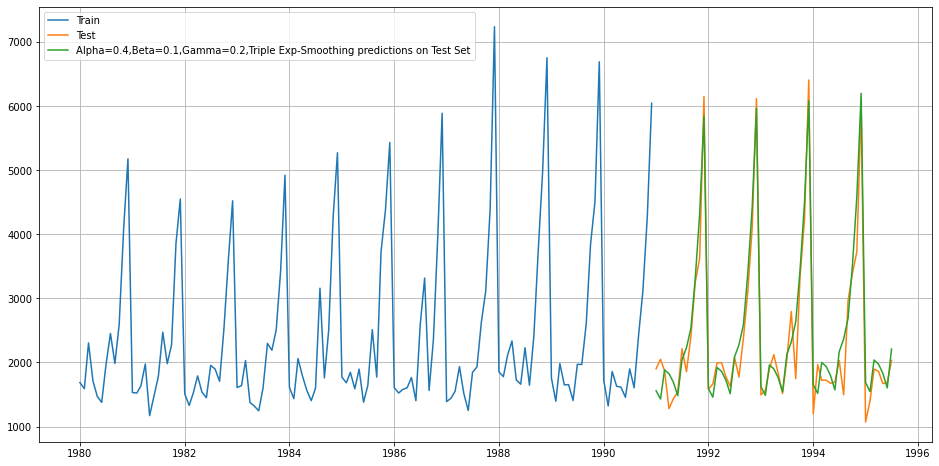

In [115]:
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['predict', 0.4, 0.1, 0.2], label='Alpha=0.4,Beta=0.1,Gamma=0.2,Triple Exp-Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [116]:
results_TES = pd.DataFrame({'RMSE': [resultsTES_1.sort_values(by=['Test RMSE']).values[0][4]]}, 
                           index=['Alpha=0.4, Beta=0.1,Gamma=0.2 Triple Exp-Smoothing'])

resultSparkling = pd.concat([resultSparkling, results_TES])
resultSparkling

RMSE
RegressionOnTime                                    1389.135175
Naive Model                                         3864.279352
Simple Average Model                                1275.081804
2-P Moving Average                                   813.400684
4-P Moving Average                                  1156.589694
6-P Moving Average                                  1283.927428
9-P Moving Average                                  1346.278315
Alpha=0.049 Simple Exp-Smoothing                    1316.034674
Alpha=0.1, Beta=0.1, Double Exp-Smoothing           1778.564670
Alpha=0.4, Beta=0.1,Gamma=0.2 Triple Exp-Smoothing   336.715250

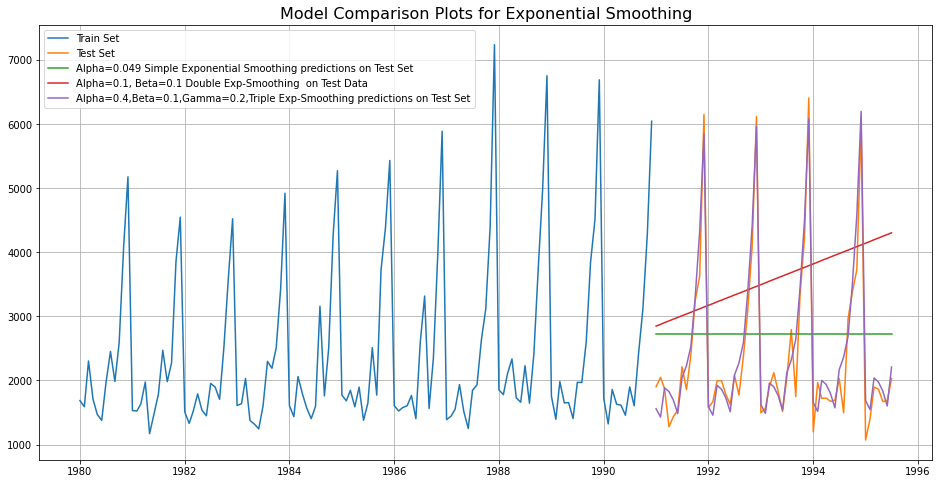

In [117]:
plt.plot(train['Sparkling'], label = 'Train Set')
plt.plot(test['Sparkling'], label = 'Test Set')

plt.plot(SES_test['predict'], label = 'Alpha=0.049 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.1, 0.1], label = 'Alpha=0.1, Beta=0.1 Double Exp-Smoothing  on Test Data')

plt.plot(TES_test['predict', 0.4, 0.1, 0.2], label='Alpha=0.4,Beta=0.1,Gamma=0.2,Triple Exp-Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.title('Model Comparison Plots for Exponential Smoothing', fontsize=16)
plt.grid()
plt.show();

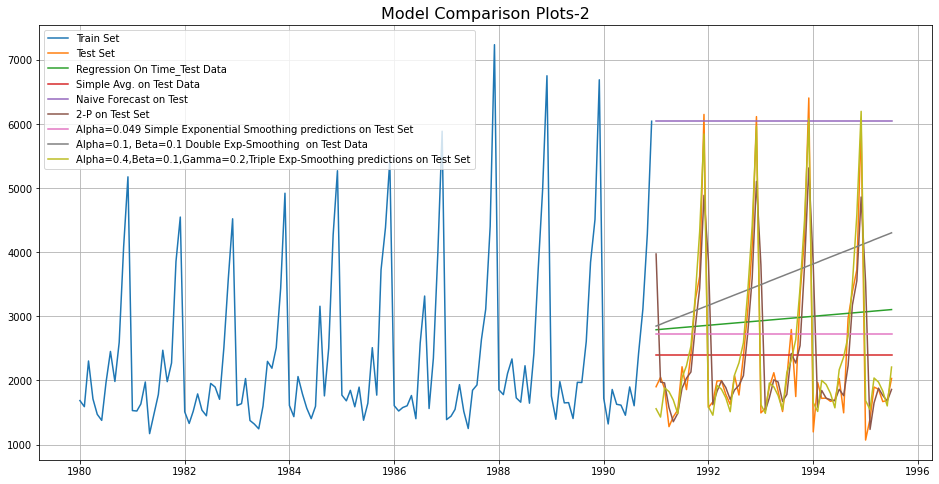

In [118]:
plt.plot(train['Sparkling'], label = 'Train Set')
plt.plot(test['Sparkling'], label = 'Test Set')

plt.plot(LR_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(SA_test['forecast'], label='Simple Avg. on Test Data')

plt.plot(Ntest['Naive'], label='Naive Forecast on Test')

plt.plot(MA_test['T_2'], label = '2-P on Test Set' )

plt.plot(SES_test['predict'], label = 'Alpha=0.049 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.1, 0.1], label = 'Alpha=0.1, Beta=0.1 Double Exp-Smoothing  on Test Data')

plt.plot(TES_test['predict', 0.4, 0.1, 0.2], label='Alpha=0.4,Beta=0.1,Gamma=0.2,Triple Exp-Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.title('Model Comparison Plots-2', fontsize=16)
plt.grid()
plt.show();

In [248]:
#ARIMA/SARIMA Models

In [119]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [120]:
dftest = adfuller(df1,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.798
DF test p-value is 0.7055958459932219
Number of lags used 12


In [121]:
#Not stationary

In [122]:
dftest1 = adfuller(df1.diff().dropna(),regression ='ct')
print('DF t-stats is %3.3f' %dftest1[0])
print('DF test p-value is', dftest1[1])
print('Number of lags used', dftest1[2])

DF t-stats is -44.912
DF test p-value is 0.0
Number of lags used 10


In [255]:
#Now it is stationary

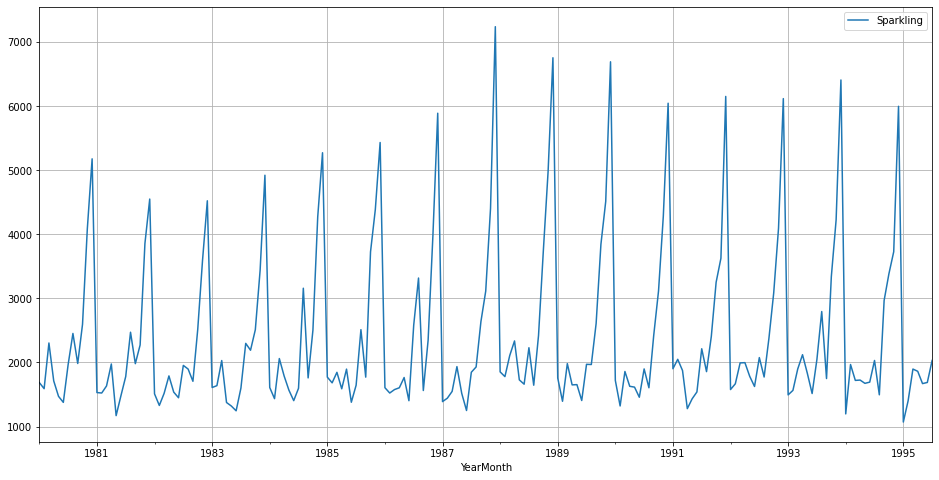

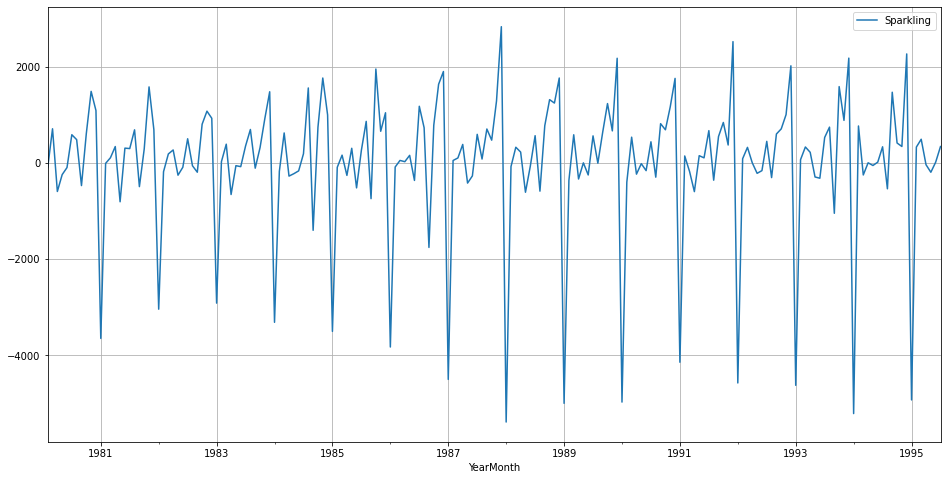

In [124]:
df1.plot(grid=True)
df1.diff().dropna().plot(grid=True);

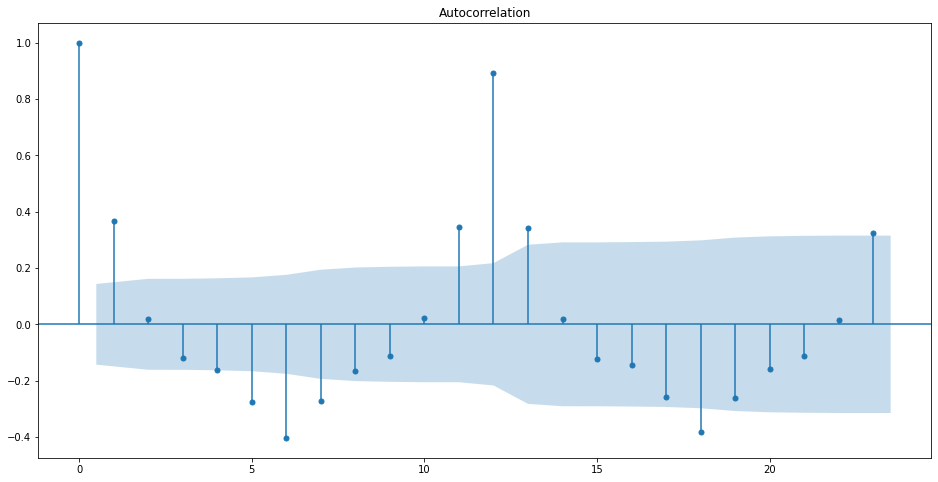

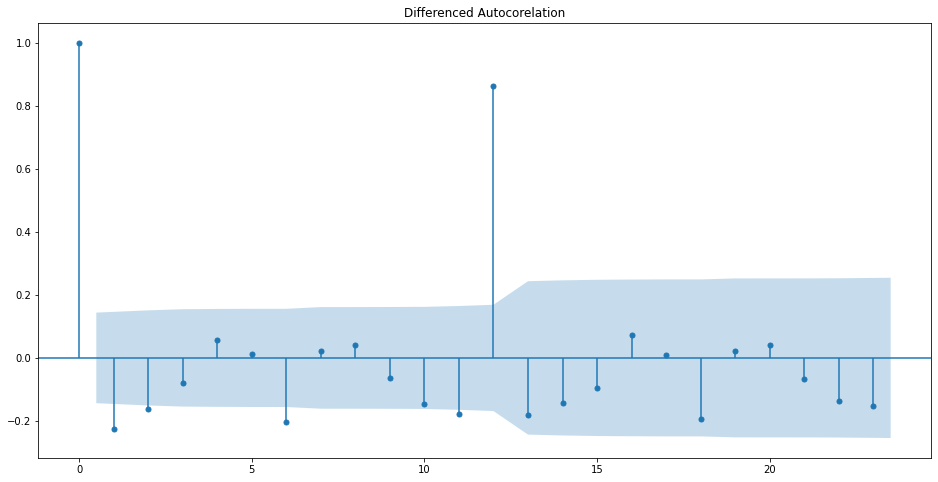

In [125]:
plot_acf(df1, alpha=0.05);
plot_acf(df1.diff().dropna(), title='Differenced Autocorelation');

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


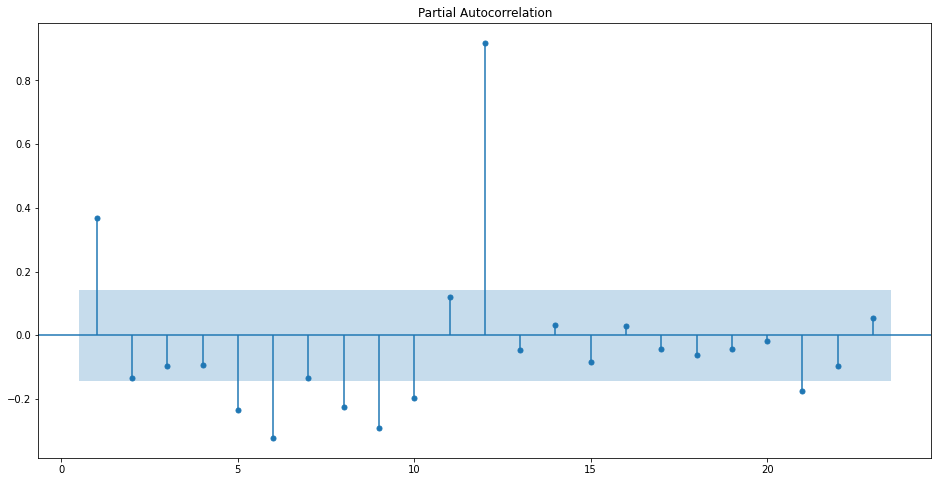

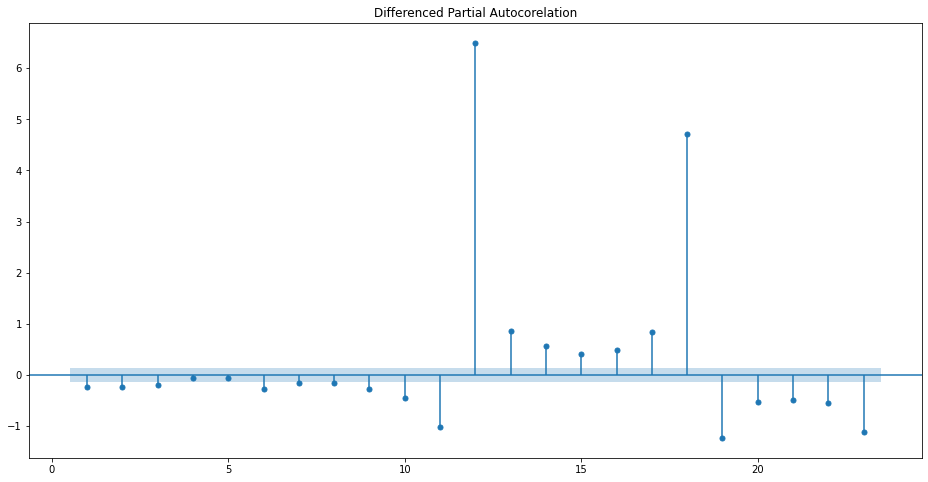

In [129]:
plot_pacf(df1,zero=False, alpha=0.05);
plot_pacf(df1.diff().dropna(), zero=False, title='Differenced Partial Autocorelation');

In [130]:
train.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [131]:
train.shape

(132, 1)

In [132]:
test.shape

(55, 1)

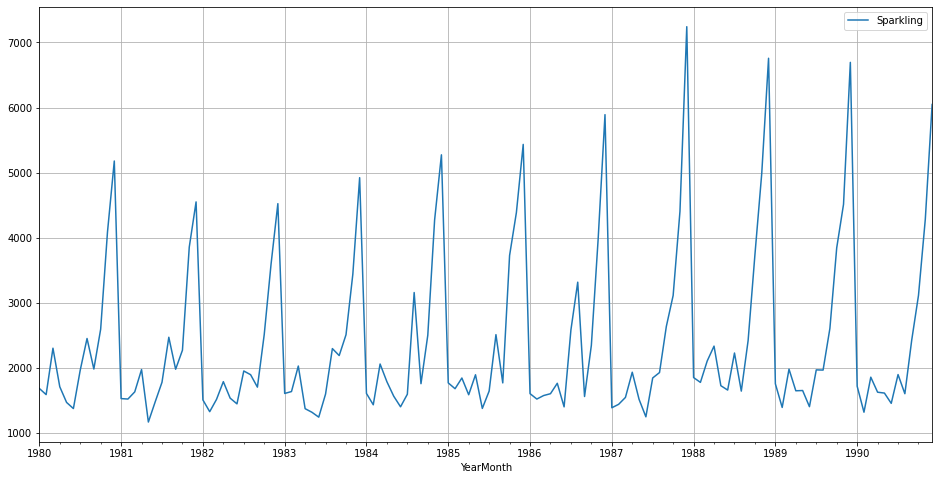

In [133]:
train.plot(grid=True);

In [134]:
dftest_train = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest_train[0])
print('DF test p-value is' ,dftest_train[1])
print('Number of lags used' ,dftest_train[2])

DF test statistic is -2.062
DF test p-value is 0.5674110388593698
Number of lags used 12


In [135]:
dftest_train1 = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest_train1[0])
print('DF test p-value is' ,dftest_train1[1])
print('Number of lags used' ,dftest_train1[2])

DF test statistic is -7.968
DF test p-value is 8.479210655514854e-11
Number of lags used 11


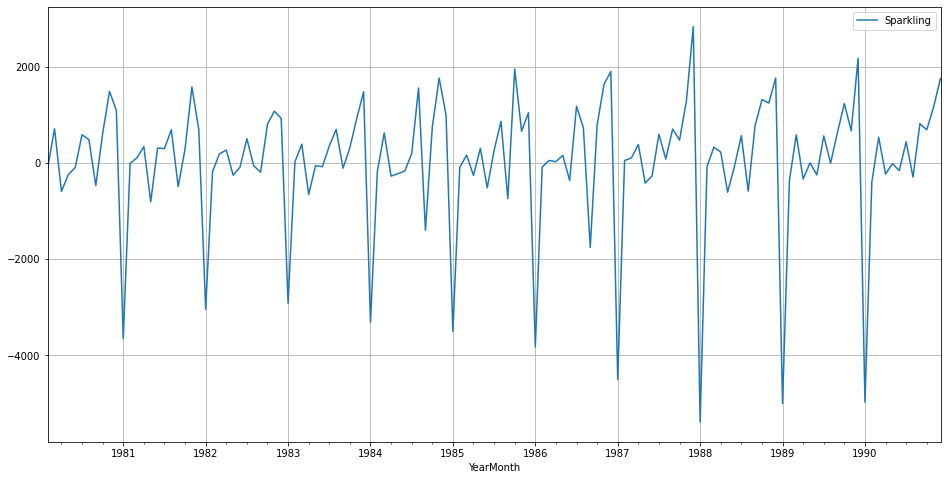

In [136]:
train.diff().dropna().plot(grid=True);

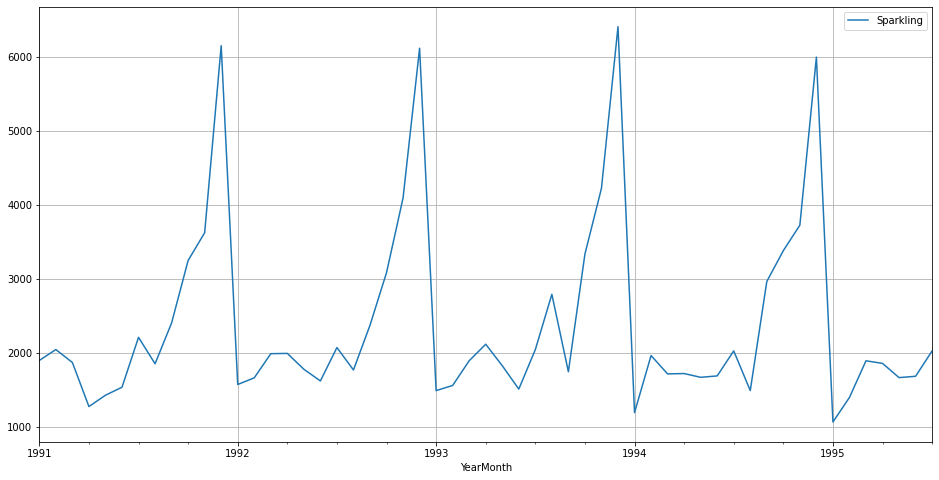

In [137]:
test.plot(grid=True);

In [138]:
dftest_test = adfuller(test,regression='ct')
print('DF test statistic is %3.3f' %dftest_test[0])
print('DF test p-value is' ,dftest_test[1])
print('Number of lags used' ,dftest_test[2])

DF test statistic is -1.770
DF test p-value is 0.7189136370409565
Number of lags used 11


In [139]:
dftest_test1 = adfuller(test.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest_test1[0])
print('DF test p-value is' ,dftest_test1[1])
print('Number of lags used' ,dftest_test1[2])

DF test statistic is -7.228
DF test p-value is 4.282873768514695e-09
Number of lags used 11


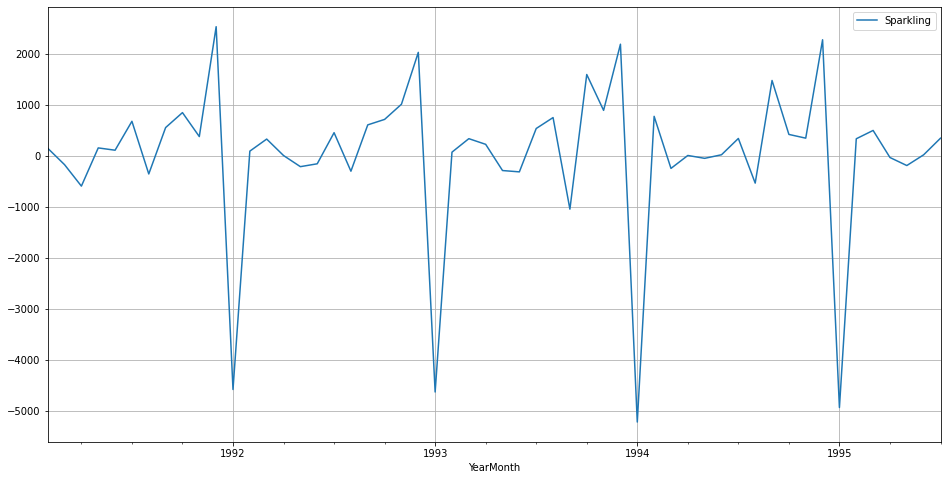

In [140]:
test.diff().dropna().plot(grid=True);

In [141]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


In [142]:
import itertools

In [143]:
p=q=range(0,4)
d=range(1,2)
pdq=list(itertools.product(p, d, q))
print('Some parameter combinations of Model:')
for i in range(0, len(pdq)):
    print('Model : {}'.format(pdq[i]))

Some parameter combinations of Model:
Model : (0, 1, 0)
Model : (0, 1, 1)
Model : (0, 1, 2)
Model : (0, 1, 3)
Model : (1, 1, 0)
Model : (1, 1, 1)
Model : (1, 1, 2)
Model : (1, 1, 3)
Model : (2, 1, 0)
Model : (2, 1, 1)
Model : (2, 1, 2)
Model : (2, 1, 3)
Model : (3, 1, 0)
Model : (3, 1, 1)
Model : (3, 1, 2)
Model : (3, 1, 3)


In [144]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [145]:
from statsmodels.tsa.arima.model import ARIMA

In [146]:
for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values, order=param).fit()
    print('ARIMA{}-AIC:{}'.format(param, ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC':ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0)-AIC:2267.6630357855465
ARIMA(0, 1, 1)-AIC:2263.0600155918555
ARIMA(0, 1, 2)-AIC:2234.4083231239947
ARIMA(0, 1, 3)-AIC:2233.99485775358
ARIMA(1, 1, 0)-AIC:2266.6085393190097


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 1)-AIC:2235.755094659257
ARIMA(1, 1, 2)-AIC:2234.527200451578
ARIMA(1, 1, 3)-AIC:2235.6078094777367
ARIMA(2, 1, 0)-AIC:2260.365743968086
ARIMA(2, 1, 1)-AIC:2233.7776262509965
ARIMA(2, 1, 2)-AIC:2213.5092125142282


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3)-AIC:2232.846221126716
ARIMA(3, 1, 0)-AIC:2257.72337899794
ARIMA(3, 1, 1)-AIC:2235.4987187083934


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 2)-AIC:2230.7781640468393
ARIMA(3, 1, 3)-AIC:2221.4650645164775


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [215]:
ARIMA_AIC.sort_values(by=['AIC'], ascending=True)

param          AIC
10  (2, 1, 2)  2213.509213
15  (3, 1, 3)  2221.465065
14  (3, 1, 2)  2230.778164
11  (2, 1, 3)  2232.846221
9   (2, 1, 1)  2233.777626
3   (0, 1, 3)  2233.994858
2   (0, 1, 2)  2234.408323
6   (1, 1, 2)  2234.527200
13  (3, 1, 1)  2235.498719
7   (1, 1, 3)  2235.607809
5   (1, 1, 1)  2235.755095
12  (3, 1, 0)  2257.723379
8   (2, 1, 0)  2260.365744
1   (0, 1, 1)  2263.060016
4   (1, 1, 0)  2266.608539
0   (0, 1, 0)  2267.663036

In [148]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Fri, 18 Feb 2022   AIC                           2213.509
Time:                        22:59:30   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.216      0.0

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


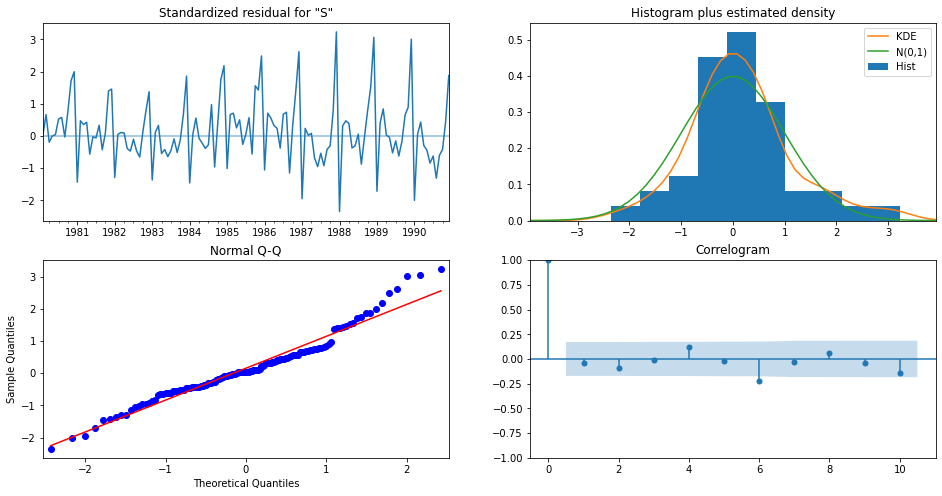

In [149]:
results_auto_ARIMA.plot_diagnostics();

In [150]:
predict_auto_ARIMA = results_auto_ARIMA.forecast(len(test))

In [218]:
rmse_ARIMA = metrics.mean_squared_error(test['Sparkling'], predict_auto_ARIMA, squared=False)
print(rmse_ARIMA)

1299.9794897616712


In [152]:
result_ARIMA= pd.DataFrame({'RMSE': (rmse_ARIMA)}, index=['ARIMA(2, 1, 2)'])

resultSparkling = pd.concat([resultSparkling, result_ARIMA])
resultSparkling

RMSE
RegressionOnTime                                    1389.135175
Naive Model                                         3864.279352
Simple Average Model                                1275.081804
2-P Moving Average                                   813.400684
4-P Moving Average                                  1156.589694
6-P Moving Average                                  1283.927428
9-P Moving Average                                  1346.278315
Alpha=0.049 Simple Exp-Smoothing                    1316.034674
Alpha=0.1, Beta=0.1, Double Exp-Smoothing           1778.564670
Alpha=0.4, Beta=0.1,Gamma=0.2 Triple Exp-Smoothing   336.715250
ARIMA(2, 1, 2)                                      1299.979490

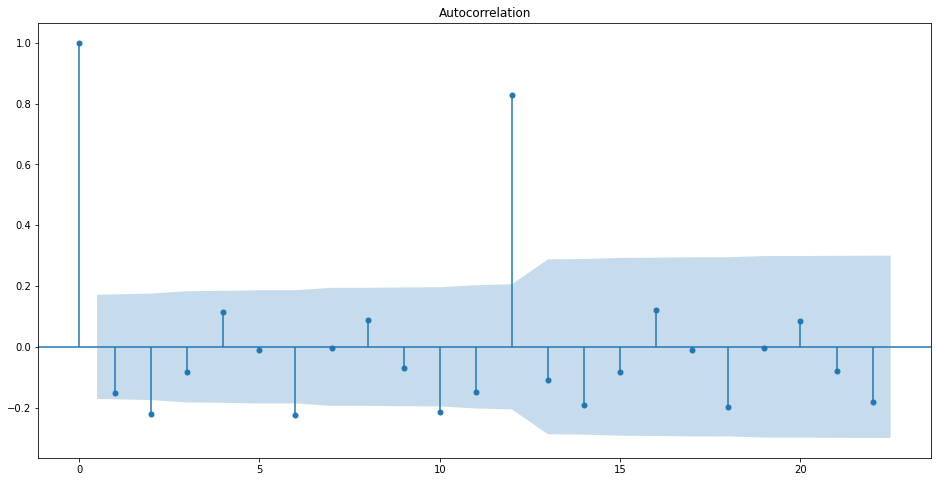

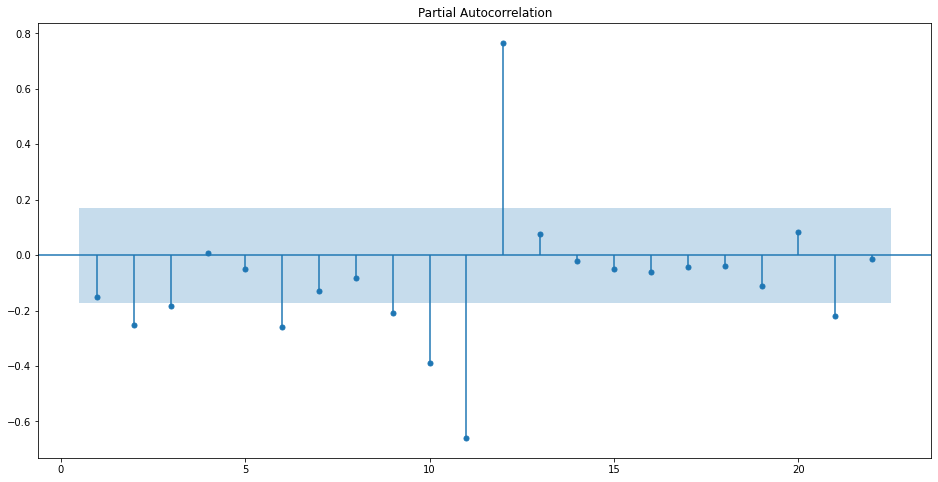

In [153]:
plot_acf(train.diff().dropna())
plot_pacf(train.diff().dropna(), zero=False)
plt.show();

In [305]:
#p=q=0 from the above graph and d=1

In [154]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(0,1,0))
results_manual_ARIMA = manual_ARIMA.fit()
print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.832
Date:                Fri, 18 Feb 2022   AIC                           2267.663
Time:                        23:00:42   BIC                           2270.538
Sample:                    01-01-1980   HQIC                          2268.831
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.885e+06   1.29e+05     14.658      0.000    1.63e+06    2.14e+06
Ljung-Box (L1) (Q):                   3.07   Jarque-Bera (JB):               198.83
Prob(Q):                              0.08   Pr

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


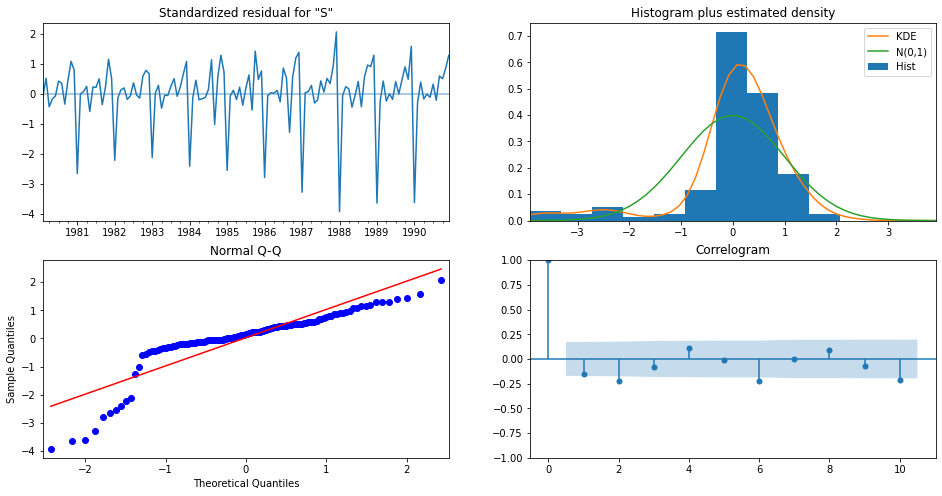

In [155]:
results_manual_ARIMA.plot_diagnostics();

In [156]:
predict_manual_ARIMA = results_manual_ARIMA.forecast(len(test))

In [157]:
rmse_mARIMA = metrics.mean_squared_error(test['Sparkling'], predict_manual_ARIMA, squared=False)
print(rmse_mARIMA)

3864.2793518443914


In [158]:
resultsmARIMA = pd.DataFrame({'RMSE': (rmse_mARIMA)}, index=['ARIMA(0,1,0)'])

resultSparkling = pd.concat([resultSparkling, resultsmARIMA])
resultSparkling

RMSE
RegressionOnTime                                    1389.135175
Naive Model                                         3864.279352
Simple Average Model                                1275.081804
2-P Moving Average                                   813.400684
4-P Moving Average                                  1156.589694
6-P Moving Average                                  1283.927428
9-P Moving Average                                  1346.278315
Alpha=0.049 Simple Exp-Smoothing                    1316.034674
Alpha=0.1, Beta=0.1, Double Exp-Smoothing           1778.564670
Alpha=0.4, Beta=0.1,Gamma=0.2 Triple Exp-Smoothing   336.715250
ARIMA(2, 1, 2)                                      1299.979490
ARIMA(0,1,0)                                        3864.279352

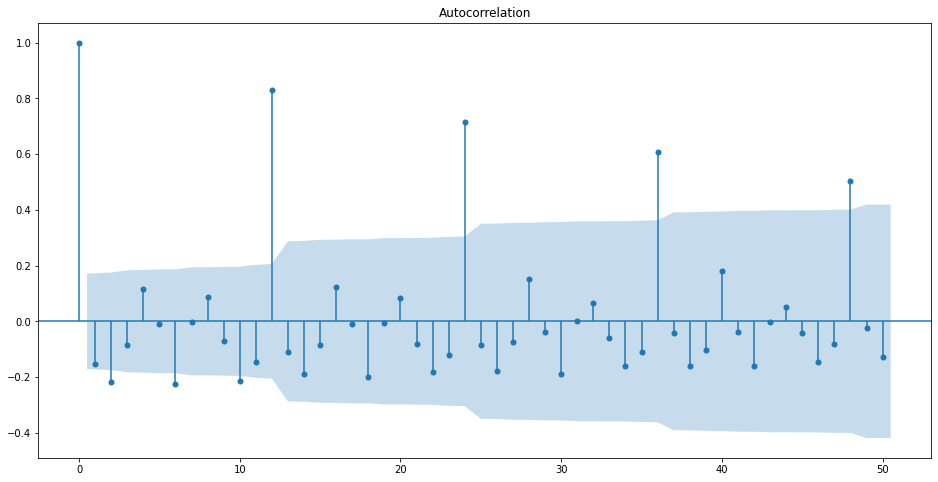

In [159]:
plot_acf(train.diff().dropna(), lags=50);

In [316]:
#seasonality = 12

In [160]:
p=q=range(0,4)
d=range(1,2)
D=range(0,1)
pdq=list(itertools.product(p,d,q))
PDQ=[(x[0], x[1], x[2],12) for x in list(itertools.product(p,D,q))]
print('Examples of the parameter combintions for the model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i],PDQ[i]))

Examples of the parameter combintions for the model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [161]:
SARIMA_AIC =pd.DataFrame(columns=['param','seasonal','AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [162]:
import statsmodels.api as sm

In [163]:
for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                                order=param, seasonal_order=param_seasonal,
                                                enforce_stationarity=False,enforce_invertibility=False)
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal,results_SARIMA.aic))
        SARIMA_AIC  = SARIMA_AIC.append({'param':param,'param_seasonal':param_seasonal,'AIC':results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.261461684376
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640237908
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:3875.9371140019684
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389572
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791699
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3726.4199366637918
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470853
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.205415861743
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.989805392076


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:4187.345832173586
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1467.4574095308406
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1469.1871052625802
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1471.0594530065482


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3960.9535557179324
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505816
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566444
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572692876


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:3468.3755243876208
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838875
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193740908
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.131965394689
SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3357.3726785783856
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.675195417678
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.224508540922
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018823869005


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3065.8306504344782
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:1428.4607679617939
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:1428.8727987964246
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:1429.5891877003412


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:3061.324488241312
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:2187.441010168703
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1887.912800720198
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1659.8789890543187


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:4088.9381660702
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1790.0326332309724
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1724.1675077439963
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1557.160506715446


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:3688.4512367557645
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1603.965477451735
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1600.5438842699677
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1557.1215626992364


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:3680.649088391751
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:1428.5993410521826
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:1429.7448376845866
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:1430.6883845178565


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:3380.82913026347
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:2168.0925408440553
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1873.9770699266462
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:1643.297366127877


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:2790.2795498033497
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1792.030072116057
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1710.6404077729374
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:1542.7418976651543


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:2755.6178239490728
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:1604.5715807630606
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:1601.0674811570289
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:1543.0488988282495


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:2329.105923905958
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:1429.6529446772986
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:1441.1435175643035
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:1431.1544761534615


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:3878.130335532572
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1954.393833990435
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1721.2688476354374


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:3672.1094305227257
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1811.24402793319
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1788.5343592682175
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1616.4894402574923


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3575.0113383668813
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1621.635508012915
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:1617.135613263075
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:1616.5412067595594


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3267.318559912026
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:1440.5134640387944
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:1442.1719780400138
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:1443.7660392853884


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3265.466314309309
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:2204.934049154585
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1907.3558974132732
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:1678.0981352619847


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:3544.17595060678
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1775.1424466682827
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1739.7167469447336
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1571.3248863517774


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:3527.2896935499753
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1590.6161606865096
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:1586.3142237079974
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1571.8069974012687


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:3146.344820713514
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:1414.9112074223158
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:1415.9502484600048
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:1417.0903506887566
SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3150.3445422302243
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:2188.463345050467
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1889.7708307503437
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:1659.6291421455858


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:4328.959302653329
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1771.8259799317216
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1723.9952194616453
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1555.5842473419311


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:4220.7581017442235
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:1588.421693722121
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:1585.5250855042482
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:1555.9345663762679


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:3926.263209743541
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:1413.8096369900059
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:1414.9147012950516
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:1415.9690344050557


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3930.3410907800126
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:2171.026403977389
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1869.9381586041102
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:1646.5217653374675


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:3376.1240357903457
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1772.3921596164025
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1711.9554911837647
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:1542.5744598439487


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:3249.088566668037
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:1590.4151894613888
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:1587.3668970873716
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:1543.1292687527296


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:2936.315761935915
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:1415.7723331330862
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:1416.7509744716358
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:1417.7649234731346


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:3091.2192991846705
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:2227.302761872421
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1946.4383435412096
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1711.4123039828153


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:3046.2682992124633
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1780.7646066055322
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1756.9357349244642
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1600.9702204974653


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:3413.770015917871
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1592.2403464856222
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:1587.634498672889
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:1585.9191733392802


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:3468.254040082759
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:1411.944972803132
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:1413.1017619299841
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:1414.1975648704883


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:3236.012329517136
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:2199.858613145544
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1905.0209495195206
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1675.4234080332592


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:3614.2728243776023
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1792.8234290333671
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1740.0911278963542
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1571.9888287864324
SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3731.388474041803
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1577.123506103529
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1573.1595849468263
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1572.3428634790912


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:2369.635539549888
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:1402.4673333763922
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:1403.1221288935324
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:1403.8241336303658


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3105.1142064825167
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2176.8681145489736
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1892.237265541609
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1661.5523432867853


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3591.0708058773894
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1757.2140931276642
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1725.6086050663482
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1557.340402845862


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:3386.1704889830057
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1625.227572386532
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1573.547669450903
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1557.6893239164672


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:3214.697974644877
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:1401.4376140317358
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:1402.5036249425718
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:1403.435893400158


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3260.7495059356215
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:2171.039589170534
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1865.057334524236
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:1646.707277296145


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:3730.351849837853
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1757.8356209294577
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1710.8433044280923
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:1542.5288646974348


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:3654.952614253326
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:1577.6922349084782
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:1569.6188616894988
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:1543.997675832588


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3331.9624273079876
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:1399.789856532824
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:1400.0769713489126
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:1407.628626421479


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3333.910897990841
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:2208.40250139061
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1946.3686291419351
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:1709.5089923155888


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:3242.984965403226
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1762.7961104702786
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1740.3783834129536
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:1600.0471974198442


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:3763.508526736476
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:1578.27480255629
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:1572.9330813826787
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:1571.6808202858706


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3302.741581341038
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:1396.86786204613
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:1397.6774722630753
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:1398.3074663249563


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3231.284467927918
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:2188.222098337822
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1906.969071114628
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:1677.423405048011


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:3001.1830022733598
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1746.2222518840592
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1727.3085035613085
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:1573.684498263423
SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:3733.3884740285675
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:1564.93775054396
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:1576.2959864876996
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:1576.349819350492


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:2073.474340503955
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:1387.7883313175025
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:1388.681483949561
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:1389.1958995268026
SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:3403.011499786591
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:2187.3147265671023
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1887.7804263944272
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:1659.625505765172


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:3736.4363972424817
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1744.9635872071738
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1727.365038007938
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:1559.43641916833


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:3422.7216092841636
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:1564.2926944357373
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:1560.789465582186
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:1559.8053830282095


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:3338.2020195990794
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:1409.9103366341706
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:1388.6026122099588
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:1389.702131647845


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:3381.5461234769054
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:2155.7749542046877
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1867.0571817270043
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:1643.7830098655045
SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:3639.259713607118
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1746.9738342178775
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1850.22790903866
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:1544.3935780873692


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:4165.3669579102025
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:1565.9762815138731
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:1561.9916294947182
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:1545.7081000334376


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:3056.908092097823
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:1387.4969970106354
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:1394.0424588589203
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:1388.2634974331966


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:3197.4108703143747


In [164]:
SARIMA_AIC.sort_values(by=['AIC'], ascending=True).head()

param  seasonal          AIC param_seasonal
252  (3, 1, 3)       NaN  1387.496997  (3, 0, 0, 12)
220  (3, 1, 1)       NaN  1387.788331  (3, 0, 0, 12)
254  (3, 1, 3)       NaN  1388.263497  (3, 0, 2, 12)
237  (3, 1, 2)       NaN  1388.602612  (3, 0, 1, 12)
221  (3, 1, 1)       NaN  1388.681484  (3, 0, 1, 12)

In [165]:
auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'], order=(3, 1, 3),
                                       seasonal_order=(3, 0, 0,12),
                                       enforce_stationarity=False,
                                       enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                      
Dep. Variable:                           Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(3, 0, [], 12)   Log Likelihood                -683.748
Date:                             Fri, 18 Feb 2022   AIC                           1387.497
Time:                                     23:36:31   BIC                           1412.715
Sample:                                 01-01-1980   HQIC                          1397.675
                                      - 12-01-1990                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6747      0.142    -11.803      0.000      -1.953      -1.397
ar.L2         -0.7438      

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


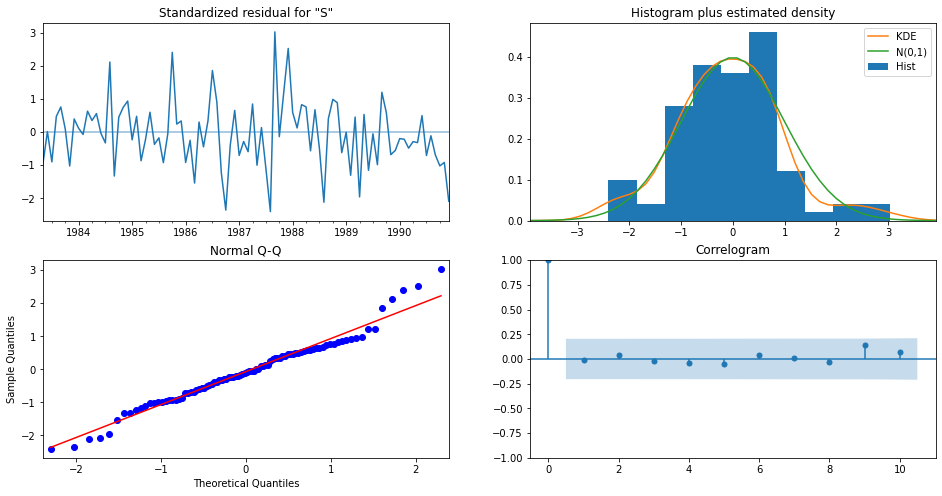

In [166]:
results_auto_SARIMA.plot_diagnostics();

In [167]:
predict_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [168]:
predict_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  1341.832621  394.848888     567.943021    2115.722221
1991-02-01  1350.045591  419.644198     527.558075    2172.533106
1991-03-01  1578.039626  421.208161     752.486801    2403.592452
1991-04-01  1667.134564  432.740200     818.979357    2515.289771
1991-05-01  1320.160081  432.774842     471.936978    2168.383185

In [169]:
rmse_SARIMA = metrics.mean_squared_error(test['Sparkling'], predict_auto_SARIMA.predicted_mean, squared=False)
print(rmse_SARIMA)

612.013183023251


In [170]:
result_SARIMA = pd.DataFrame({'RMSE': (rmse_SARIMA)}, index=['SARIMA(3, 1, 3)(3, 0, 0, 12)'])
resultSparkling=pd.concat([resultSparkling,result_SARIMA])
resultSparkling

RMSE
RegressionOnTime                                    1389.135175
Naive Model                                         3864.279352
Simple Average Model                                1275.081804
2-P Moving Average                                   813.400684
4-P Moving Average                                  1156.589694
6-P Moving Average                                  1283.927428
9-P Moving Average                                  1346.278315
Alpha=0.049 Simple Exp-Smoothing                    1316.034674
Alpha=0.1, Beta=0.1, Double Exp-Smoothing           1778.564670
Alpha=0.4, Beta=0.1,Gamma=0.2 Triple Exp-Smoothing   336.715250
ARIMA(2, 1, 2)                                      1299.979490
ARIMA(0,1,0)                                        3864.279352
SARIMA(3, 1, 3)(3, 0, 0, 12)                         612.013183

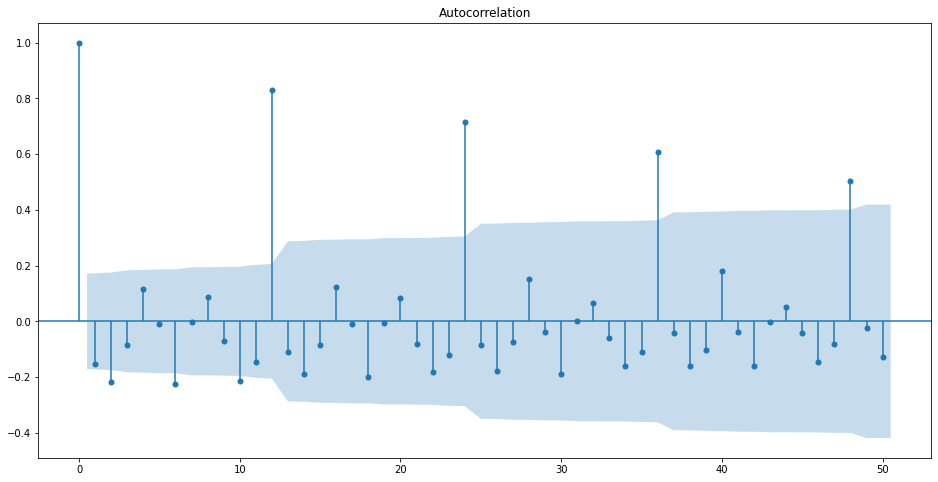

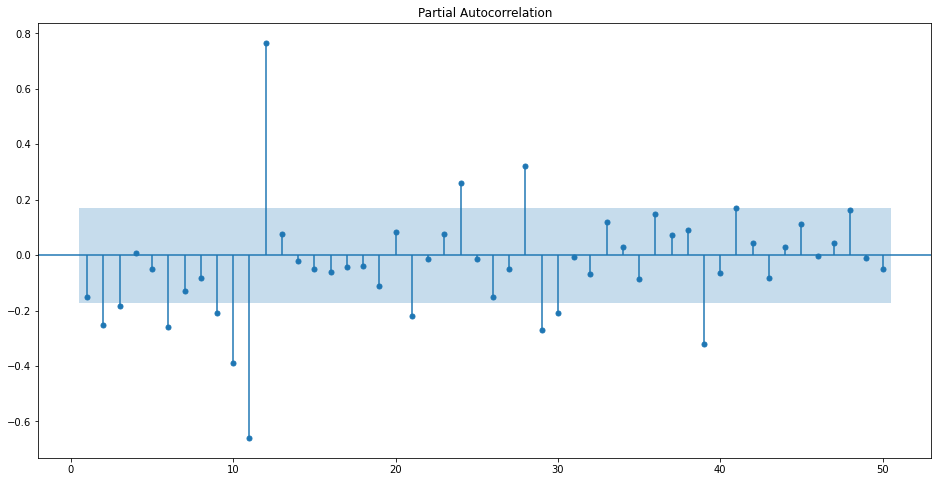

In [171]:
plot_acf(train.diff().dropna(),lags=50)
plot_pacf(train.diff().dropna(), zero=False, lags=50)
plt.show();

In [199]:
manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(0, 0, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                         SARIMAX Results                                          
Dep. Variable:                                  Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(0, 0, [1, 2, 3], 12)   Log Likelihood               -1933.969
Date:                                    Fri, 18 Feb 2022   AIC                           3875.937
Time:                                            23:48:59   BIC                           3886.110
Sample:                                        01-01-1980   HQIC                          3880.046
                                             - 12-01-1990                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12   -6.873e+13        nan        nan       

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2937: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse


C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


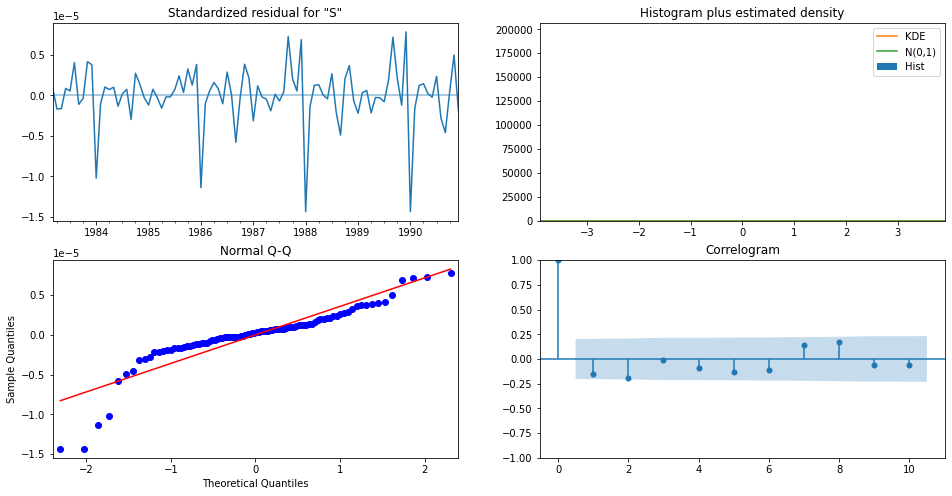

In [200]:
results_manual_SARIMA.plot_diagnostics()
plt.show();

In [201]:
predict_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [202]:
rmse_mSARIMA = metrics.mean_squared_error(test['Sparkling'], predict_manual_SARIMA.predicted_mean, squared=False)
print(rmse_mSARIMA)

1619.2218713909488


In [203]:
result_man_SARIMA = pd.DataFrame({'RMSE': (rmse_mSARIMA)}, index=['SARIMA(0, 1, 0)(0, 0, 3, 12)'])
resultSparkling=pd.concat([resultSparkling,result_man_SARIMA])
resultSparkling

RMSE
RegressionOnTime                                    1389.135175
Naive Model                                         3864.279352
Simple Average Model                                1275.081804
2-P Moving Average                                   813.400684
4-P Moving Average                                  1156.589694
6-P Moving Average                                  1283.927428
9-P Moving Average                                  1346.278315
Alpha=0.049 Simple Exp-Smoothing                    1316.034674
Alpha=0.1, Beta=0.1, Double Exp-Smoothing           1778.564670
Alpha=0.4, Beta=0.1,Gamma=0.2 Triple Exp-Smoothing   336.715250
ARIMA(2, 1, 2)                                      1299.979490
ARIMA(0,1,0)                                        3864.279352
SARIMA(3, 1, 3)(3, 0, 0, 12)                         612.013183
SARIMA(0, 1, 0)(0, 0, 3, 12)                        1619.221871

In [204]:
resultSparkling.sort_values(by='RMSE', ascending=True)

RMSE
Alpha=0.4, Beta=0.1,Gamma=0.2 Triple Exp-Smoothing   336.715250
SARIMA(3, 1, 3)(3, 0, 0, 12)                         612.013183
2-P Moving Average                                   813.400684
4-P Moving Average                                  1156.589694
Simple Average Model                                1275.081804
6-P Moving Average                                  1283.927428
ARIMA(2, 1, 2)                                      1299.979490
Alpha=0.049 Simple Exp-Smoothing                    1316.034674
9-P Moving Average                                  1346.278315
RegressionOnTime                                    1389.135175
SARIMA(0, 1, 0)(0, 0, 3, 12)                        1619.221871
Alpha=0.1, Beta=0.1, Double Exp-Smoothing           1778.564670
Naive Model                                         3864.279352
ARIMA(0,1,0)                                        3864.279352

In [205]:
fullmodel1 = ExponentialSmoothing(df1,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.4,
                                                                 smoothing_trend=0.1,
                                                                 smoothing_seasonal=0.2)

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [206]:
RMSE_fullmodel1 = metrics.mean_squared_error(df1['Sparkling'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 376.7746175153367


In [207]:
prediction_1 = fullmodel1.forecast(steps=12)

C:\Users\bicky\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [219]:
prediction_1

1995-08-01    2063.448928
1995-09-01    2579.407431
1995-10-01    3416.654241
1995-11-01    4304.476935
1995-12-01    6604.875995
1996-01-01    1564.539687
1996-02-01    1849.759839
1996-03-01    2098.878757
1996-04-01    2022.428764
1996-05-01    1834.540611
1996-06-01    1712.408856
1996-07-01    2176.425389
Freq: MS, dtype: float64

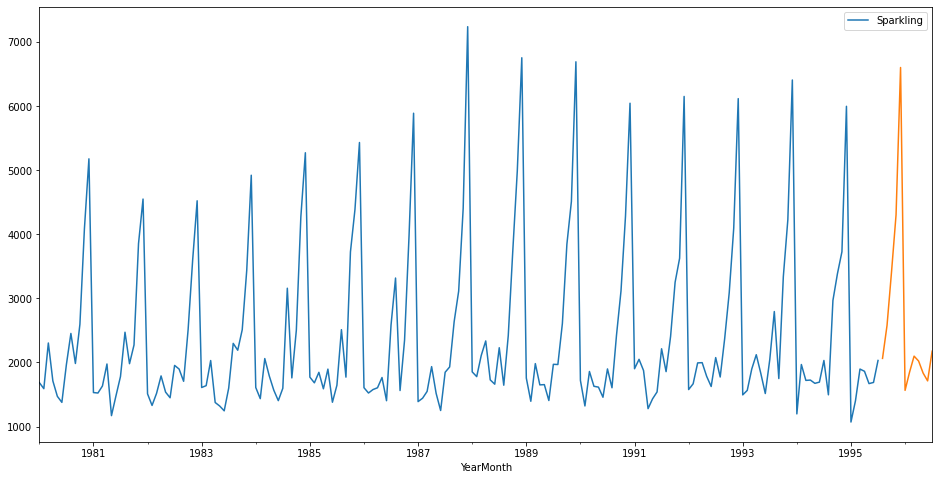

In [208]:
df1.plot()
prediction_1.plot();

In [209]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

lower_CI   prediction     upper_ci
1995-08-01  1322.989263  2063.448928  2803.908592
1995-09-01  1838.947766  2579.407431  3319.867096
1995-10-01  2676.194577  3416.654241  4157.113906
1995-11-01  3564.017270  4304.476935  5044.936599
1995-12-01  5864.416331  6604.875995  7345.335660

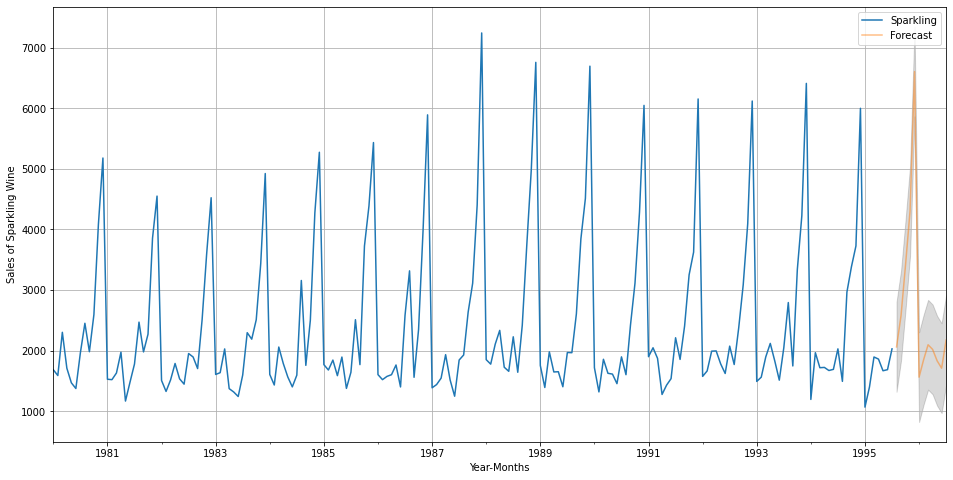

In [210]:
axis=df1.plot(label='Actual')
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales of Sparkling Wine')
plt.legend(loc='best')
plt.grid()
plt.show()

In [220]:
#the end